<a href="https://colab.research.google.com/github/LRLeite/Data-Analytics/blob/main/Projeto%20COVID-19/covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🦠 Análise de Dados COVID-19 - Brasil e Mundo

Esta análise explora a evolução da pandemia de COVID-19 no Brasil e no mundo, com foco em casos confirmados, mortes e vacinação.<br><br>

**Objetivos da análise:**
- Examinar tendências globais de casos e mortes.
- Comparar a cobertura vacinal entre continentes.
- Identificar rankings de países com maior e menor cobertura vacinal.<br><br>

Este notebook é voltado para quem deseja entender o impacto da pandemia e os progressos na vacinação.<br><br>



**Fonte dos Dados:** [Our World in Data](https://github.com/owid/covid-19-data)


É importante notar que os dados de COVID-19 podem variar entre fontes devido a diferenças nas definições de casos/mortes/vacinação, metodologias de coleta, frequência de atualização, atrasos na notificação, correções retroativas e estimativas populacionais.


# **Carregamento e Preparação dos Dados**


## Importação de Bibliotecas

In [1]:
#Bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib.ticker

## Carregamento da Base de Dados

In [2]:
#Carrega o conjunto de dados a partir da URL
url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv"
df = pd.read_csv(url)
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN


In [3]:
#Exibe as datas do primeiro e último registro para verificar o período analisado
print(f'Primeiro registro: {df.date.min()}')
print(f'Última atualização: {df.date.max()}')

Primeiro registro: 2020-01-01
Última atualização: 2024-08-14


## Preparação dos dados

In [4]:
#Exibe todos os nomes das colunas presentes no DataFrame.
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [5]:
#Define e seleciona um subconjunto de colunas para análise subsequente
columns_final = ['continent', 'location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths',
                 'new_deaths_smoothed', 'total_cases_per_million', 'total_deaths_per_million', 'total_tests', 'total_tests_per_thousand',
                 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated','total_vaccinations_per_hundred',
                 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'new_vaccinations', 'new_vaccinations_smoothed', 'population']

#Remove as colunas que não serão utilizadas na análise
df.drop(columns=df.columns.difference(columns_final), inplace = True)

df.head()

,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,total_tests_per_thousand,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,population
0,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41128772
1,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41128772
2,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41128772
3,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41128772
4,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41128772


In [6]:
#Verificar os tipos dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 22 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   continent                            402910 non-null  object 
 1   location                             429435 non-null  object 
 2   date                                 429435 non-null  object 
 3   total_cases                          411804 non-null  float64
 4   new_cases                            410159 non-null  float64
 5   new_cases_smoothed                   408929 non-null  float64
 6   total_deaths                         411804 non-null  float64
 7   new_deaths                           410608 non-null  float64
 8   new_deaths_smoothed                  409378 non-null  float64
 9   total_cases_per_million              411804 non-null  float64
 10  total_deaths_per_million             411804 non-null  float64
 11  total_tests  

In [7]:
#Converter coluna de data
df['date'] = pd.to_datetime(df['date'])

In [8]:
#Verificação de NAs
df.isna().sum()

,0
continent,26525
location,0
date,0
total_cases,17631
new_cases,19276
new_cases_smoothed,20506
total_deaths,17631
new_deaths,18827
new_deaths_smoothed,20057
total_cases_per_million,17631


In [9]:
#Para as colunas numéricas, os NAs serão substituídos por zero
df.fillna(df[['total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'total_cases_per_million', 'total_deaths_per_million',
              'total_tests', 'total_tests_per_thousand', 'total_vaccinations', 'people_vaccinated','people_fully_vaccinated',
              'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred',
              'new_vaccinations', 'population']].fillna(0), inplace = True)

df.head()

,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,total_tests_per_thousand,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,population
0,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,41128772
1,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,41128772
2,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,41128772
3,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,41128772
4,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,41128772


In [10]:
#Converter colunas específicas de float para int para que os números inteiros sejam devidamente representados
df[['total_cases', 'new_cases', 'total_deaths',
    'new_deaths', 'total_tests', 'total_vaccinations',
    'people_vaccinated', 'people_fully_vaccinated',
    'new_vaccinations', 'population']] = df[['total_cases', 'new_cases', 'total_deaths',
                                              'new_deaths', 'total_tests', 'total_vaccinations',
                                              'people_vaccinated', 'people_fully_vaccinated',
                                              'new_vaccinations', 'population']].astype(int)

Verificar os países que não reportaram o `número de casos` e a `vacinação`. Esses países serão excluídos da análise.

ps: nesta análise não serão considerados os casos de subnotificação

In [11]:
#Identifica os países que não notificaram nenhum caso (total_cases máximo é zero) e armazena a lista de nomes desses países.
countries_not_notified = df.groupby('location')['total_cases'].max()[df.groupby('location')['total_cases'].max() == 0].index.tolist()
print(f"Países que não notificaram (total_cases == 0): {countries_not_notified}")
print(f"Total de países a serem excluídos: {len(countries_not_notified)}")

Países que não notificaram (total_cases == 0): ['England', 'Hong Kong', 'Macao', 'North Korea', 'Northern Cyprus', 'Northern Ireland', 'Scotland', 'Taiwan', 'Turkmenistan', 'Wales', 'Western Sahara']
Total de países a serem excluídos: 11


In [12]:
#Remove os registros dos países identificados.
df = df[df.location.isin(countries_not_notified) == False]
df.groupby('location')['total_cases'].max()[df.groupby('location')['total_cases'].max() == 0].index.tolist()

[]

In [13]:
#Identifica os países que não notificaram nenhum caso (total_vaccinations máximo é zero) e armazena a lista de nomes desses países.
countries_not_notified_vaccination = df.groupby('location')['total_vaccinations'].max()[df.groupby('location')['total_vaccinations'].max() == 0].index.tolist()
print(f"Países que não notificaram a vacinação (total_cases == 0): {countries_not_notified_vaccination}")
print(f"Total de países a serem excluídos: {len(countries_not_notified_vaccination)}")

Países que não notificaram a vacinação (total_cases == 0): ['American Samoa', 'Eritrea', 'French Guiana', 'Guadeloupe', 'Guam', 'Marshall Islands', 'Martinique', 'Mayotte', 'Micronesia (country)', 'Northern Mariana Islands', 'Palau', 'Puerto Rico', 'Reunion', 'Saint Barthelemy', 'Saint Martin (French part)', 'Saint Pierre and Miquelon', 'United States Virgin Islands', 'Vatican']
Total de países a serem excluídos: 18


In [14]:
#Remover os registros dos países que não apresentaram dados de vacinação
df = df[df.location.isin(countries_not_notified_vaccination) == False]
df.groupby('location')['total_vaccinations'].max()[df.groupby('location')['total_vaccinations'].max() == 0].index.tolist()

[]

In [15]:
#Identificar as localizações onde o continente é NaN
df['location'].loc[df['continent'].isna()].unique()

array(['Africa', 'Asia', 'Europe', 'European Union (27)',
       'High-income countries', 'Low-income countries',
       'Lower-middle-income countries', 'North America', 'Oceania',
       'South America', 'Upper-middle-income countries', 'World'],
      dtype=object)

A coluna `continent` possui NAs para localizações que representam agregações (como 'World', 'Europe'). A seguir, irei separar essas agregações e criar 3 datasets que serão utilizados em futuras análise: df, df_continents e df_world


In [16]:
#Separar os datasets para as futuras análises
df_continents = df[df['location'].isin(['Europe', 'Asia', 'North America', 'South America', 'Africa', 'Oceania'])].sort_values('date')
df_world = df[df['location'] == 'World'].sort_values('date')

In [17]:
#Identificar as localizações onde o continente é NaN
locations_without_continent = df['location'].loc[df['continent'].isna()].unique()

#Remove os dados agregados por continente do dataset principal
df = df[df.location.isin(locations_without_continent) == False]

# **Análise de Dados**
Esta seção se dedica à análise dos dados de COVID-19, com foco em tendências globais e específicas.


# **Número de novos casos, mortes e vacinas no mundo ao longo do tempo**

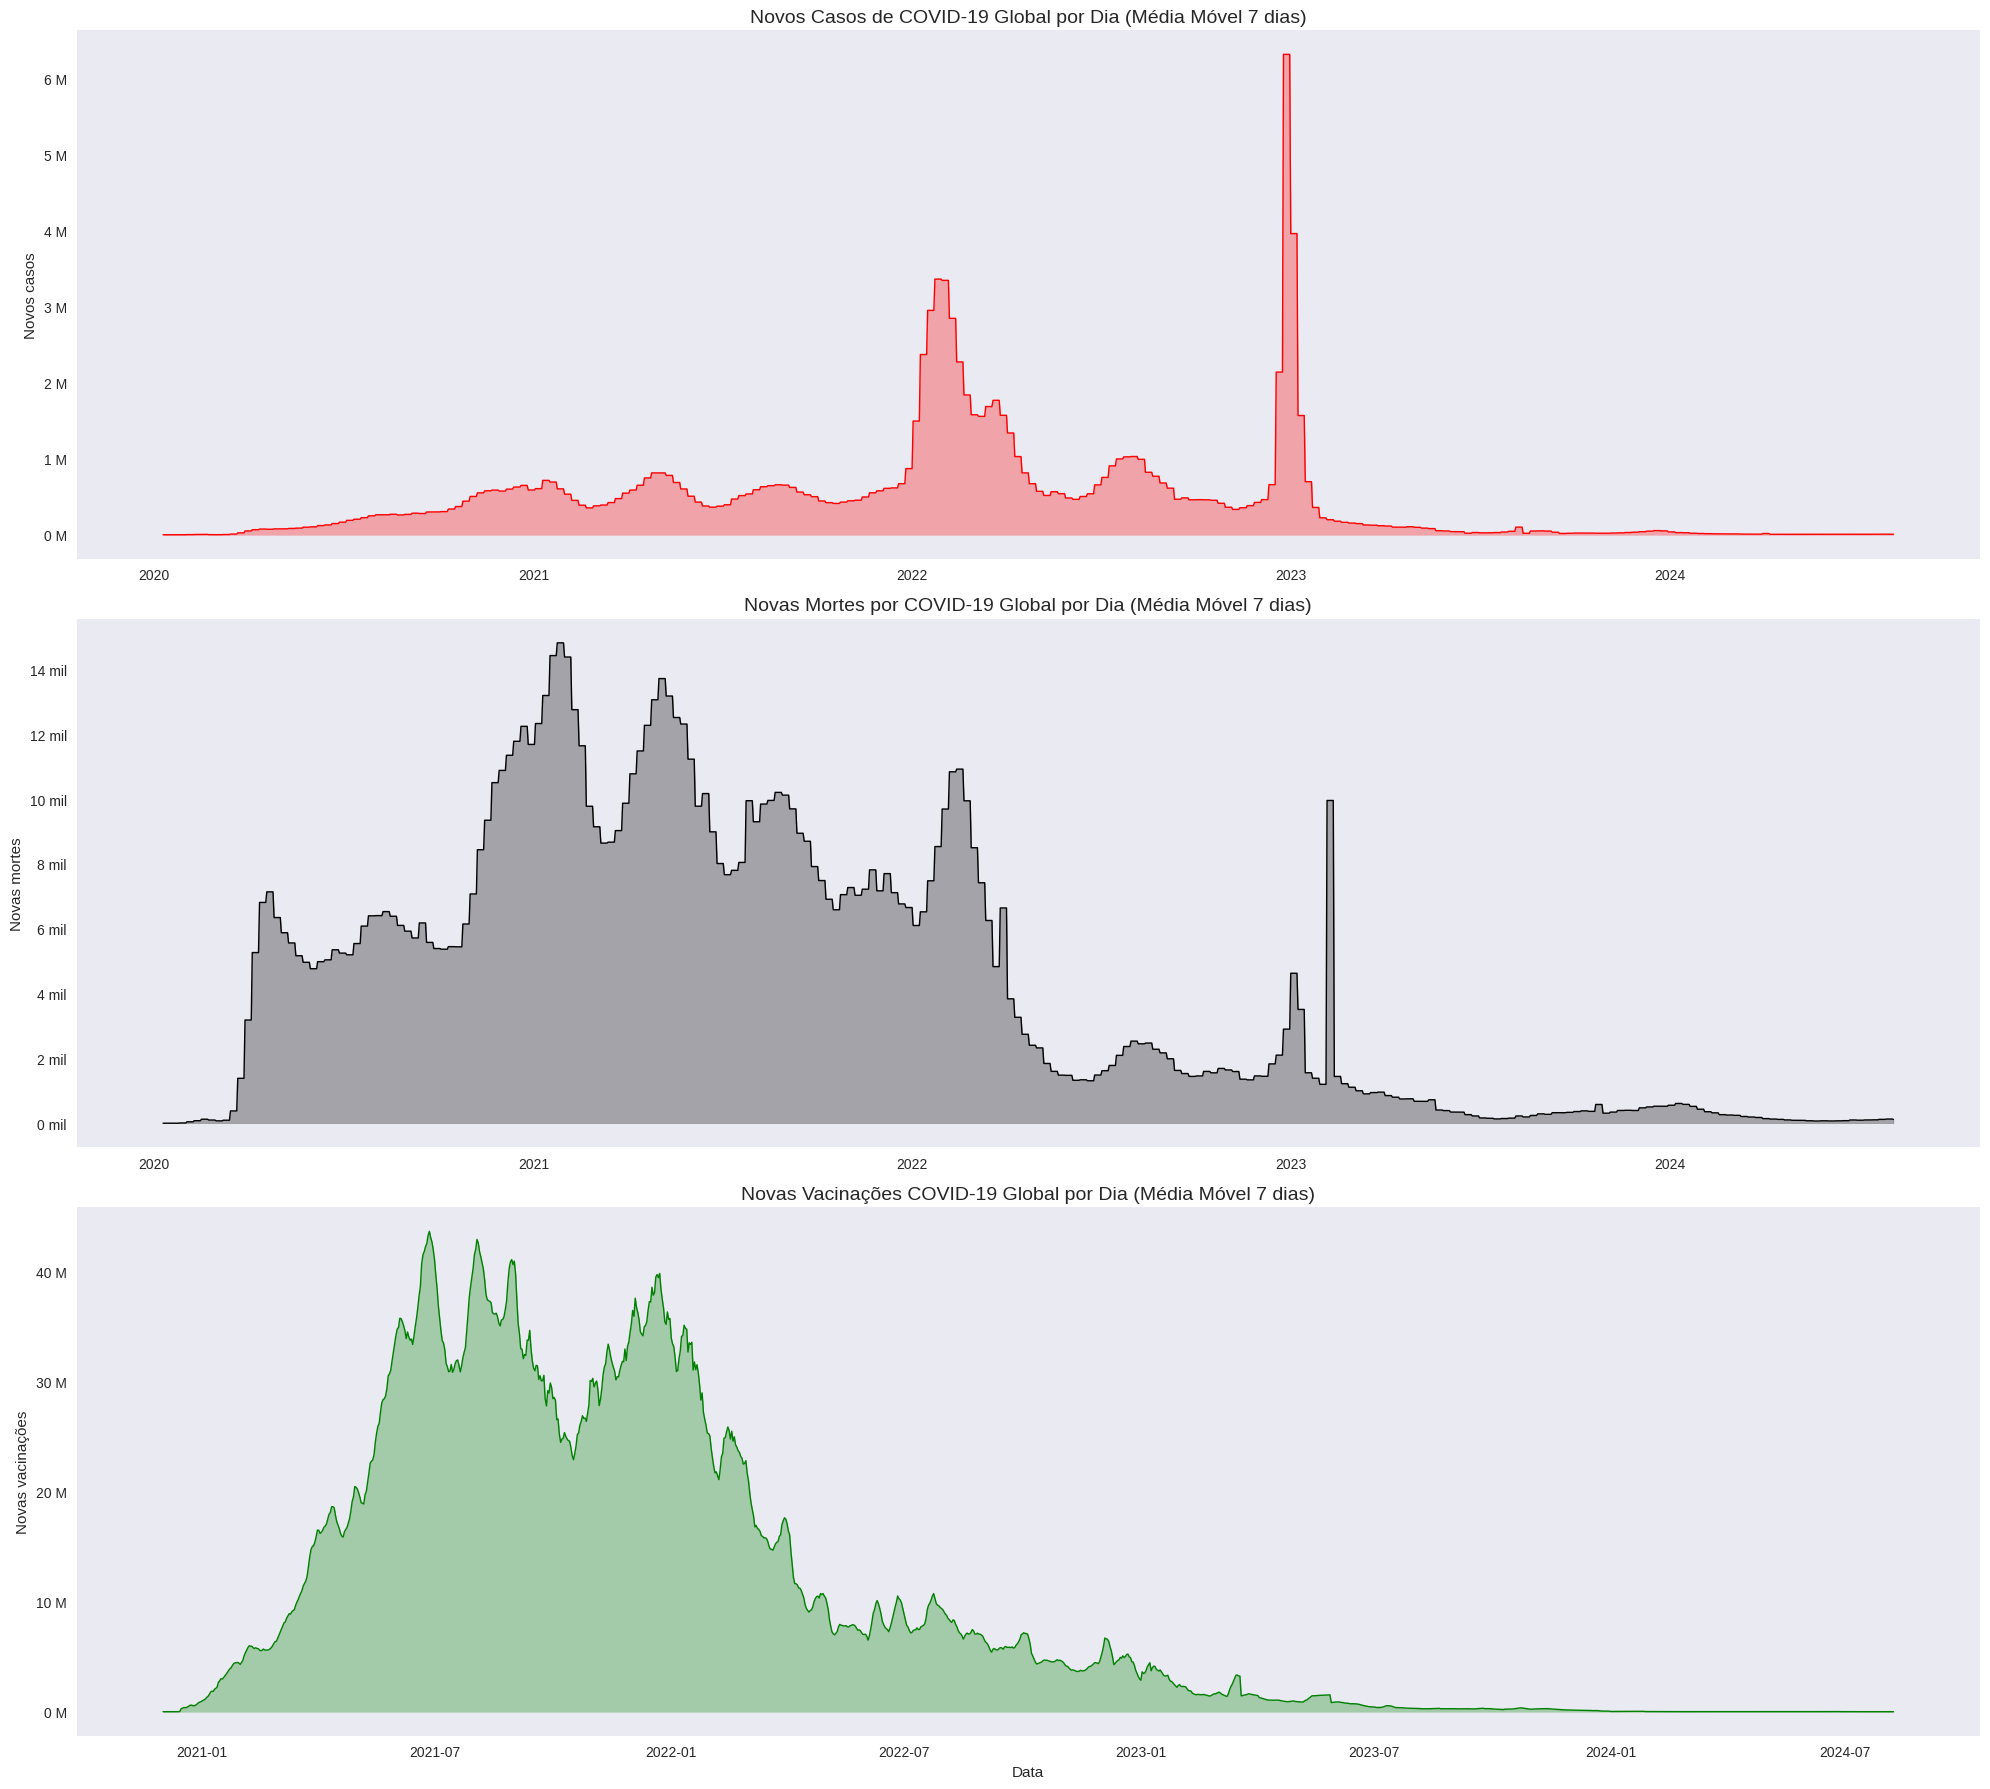

In [18]:
#Configurar gráficos
plt.style.use('seaborn-v0_8')
fig, axes = plt.subplots(3, 1, figsize = (20, 18), dpi = 100)

#Gráfico 1: Novos casos
axes[0].plot(df_world['date'], df_world['new_cases_smoothed'], color ='red', linewidth = 1)
axes[0].fill_between(df_world['date'], df_world['new_cases_smoothed'], alpha = 0.3, color = 'red')
axes[0].set_title('Novos Casos de COVID-19 Global por Dia (Média Móvel 7 dias)', fontsize = 14)
axes[0].set_ylabel('Novos casos')
axes[0].grid(False)
axes[0].ticklabel_format(style='plain', axis = 'y')
axes[0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: '%1.0f' % (x*1e-6) + ' M'))

# Gráfico 2: Novas mortes
axes[1].plot(df_world['date'], df_world['new_deaths_smoothed'], color = 'black', linewidth = 1)
axes[1].fill_between(df_world['date'], df_world['new_deaths_smoothed'], alpha = 0.3, color ='black')
axes[1].set_title('Novas Mortes por COVID-19 Global por Dia (Média Móvel 7 dias)', fontsize = 14)
axes[1].set_ylabel('Novas mortes')
axes[1].grid(False)
axes[1].ticklabel_format(style = 'plain', axis = 'y')
axes[1].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: '%1.0f' % (x / 1000) + ' mil'))

# Gráfico 3: Novas vacinações
axes[2].plot(df_world['date'], df_world['new_vaccinations_smoothed'], color = 'green', linewidth = 1)
axes[2].fill_between(df_world['date'], df_world['new_vaccinations_smoothed'], alpha = 0.3, color = 'green')
axes[2].set_title('Novas Vacinações COVID-19 Global por Dia (Média Móvel 7 dias)', fontsize = 14)
axes[2].set_ylabel('Novas vacinações')
axes[2].set_xlabel('Data')
axes[2].grid(False)
axes[2].ticklabel_format(style = 'plain', axis = 'y')
axes[2].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: '%1.0f' % (x*1e-6) + ' M'))

plt.tight_layout()
plt.show()

# **Número de casos, mortes, vacinas e relação caso-fatalidade por continente**
Esta seção analisa tendências globais de COVID-19, agregando casos confirmados, mortes, vacinações e calculando a taxa de letalidade (óbitos/casos) por continente.

In [19]:
#Selecionar os dados de interesse para analisar os números por continente
df_continents_1 = df_continents.groupby('location')[['total_cases', 'total_deaths', 'total_vaccinations']].max().sort_values(by = 'location')

In [20]:
#Calcular a taxa de letalidade
df_continents_1['taxa_letalidade'] = ((df_continents_1['total_deaths']/df_continents_1['total_cases']) * 100).round(2)

In [21]:
#Converter o índice 'location' em coluna, resetar e dropar o índice anterior e depois reordenar as colunas
df_continents_1['continent'] = df_continents_1.index
df_continents_1.reset_index(drop = True, inplace = True)
df_continents_1 = df_continents_1[['continent', 'total_cases', 'total_deaths', 'total_vaccinations', 'taxa_letalidade']]

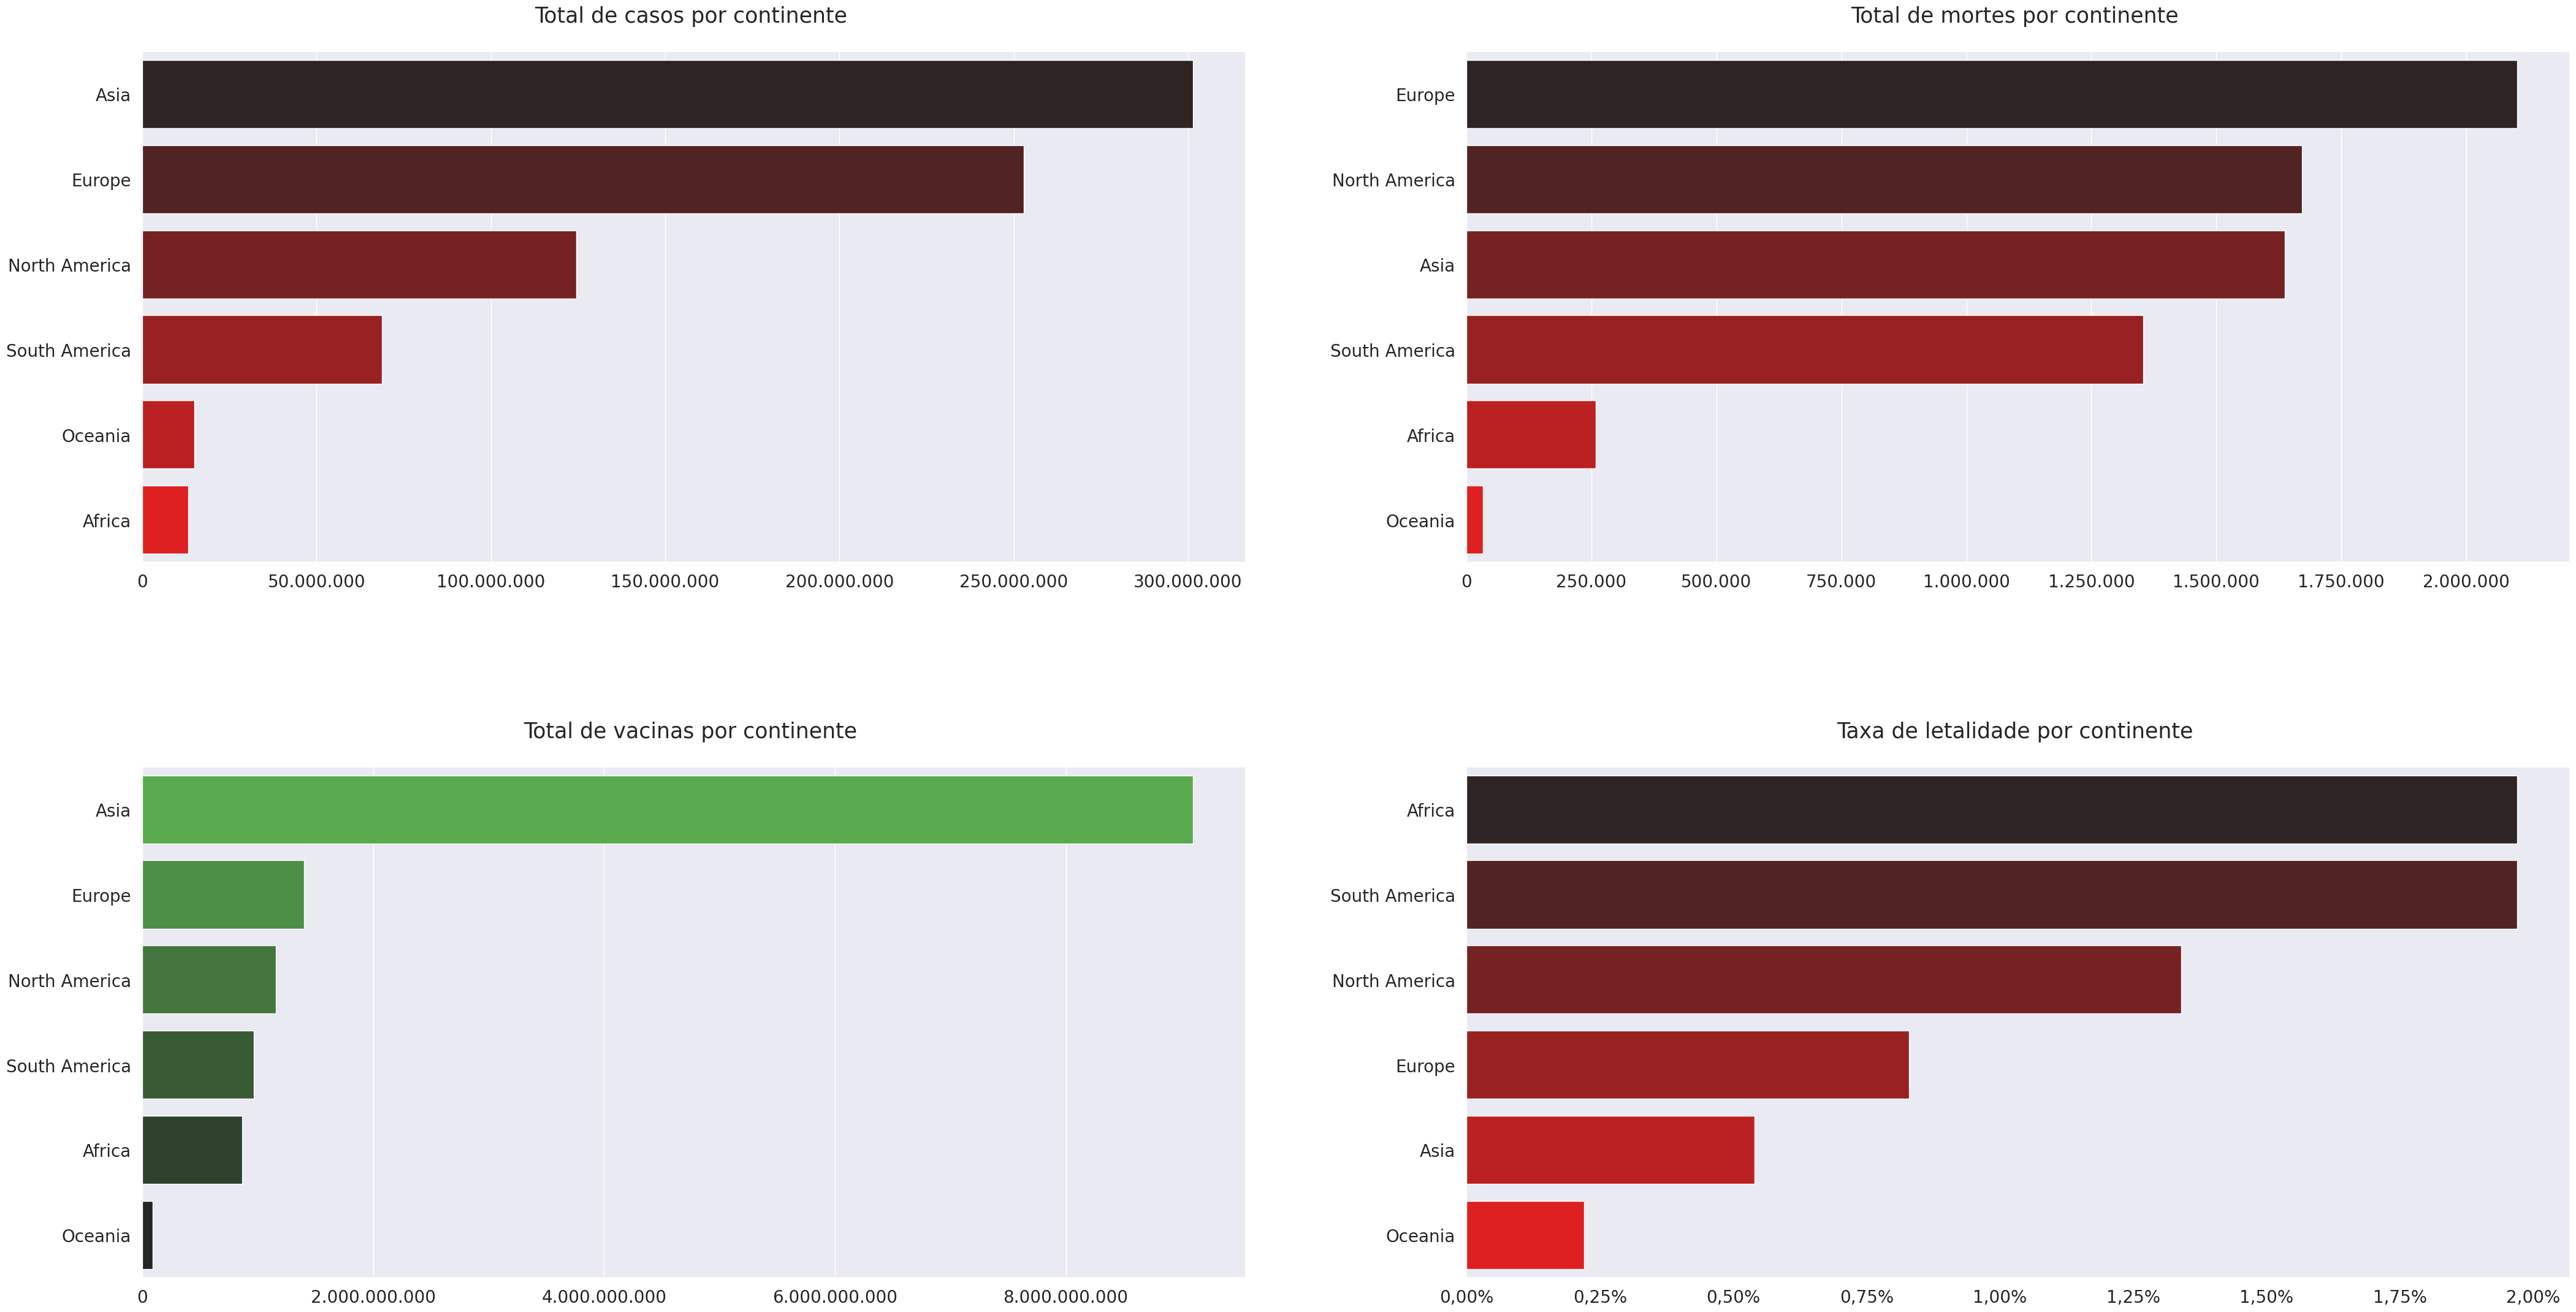

In [22]:
#Configuração gráficos
sns.set_theme(style = "dark")
fig, axes = plt.subplots(2, 2, figsize = (36,25), dpi = 100)
plt.subplots_adjust(left = 0.1, bottom = 0.1, right = 1.2, top = 0.9, wspace = 0.2, hspace = 0.4)

#paleta de cores
paleta_vermelho = sns.dark_palette("red", n_colors = 6, as_cmap = False)
paleta_verde = sns.dark_palette("#4db93f", reverse = True, as_cmap = False)

#Achata o array de eixos 2x2 para facilitar a indexação com um único índice (de 0 a 3)
axes = axes.flatten()

#Gráfico 1: Total de casos
ax = axes[0]
sns.barplot(data = df_continents_1.sort_values('total_cases', ascending = False),
            x = 'total_cases', y = 'continent', hue = 'continent',
            palette = paleta_vermelho, errorbar = None, ax = ax, legend = False)
ax.set_title('Total de casos por continente \n', fontsize = 25)
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.tick_params(axis ='x', labelsize = 20)
ax.tick_params(axis ='y', labelsize = 20)
ax.xaxis.grid()
ax.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',').replace(',', '.')))


#Gráfico 2: Total de mortes
ax = axes[1]
sns.barplot(data = df_continents_1.sort_values('total_deaths', ascending = False),
            x = 'total_deaths', y = 'continent', hue = 'continent',
            palette = paleta_vermelho, errorbar = None, ax = ax, legend = False)
ax.set_title('Total de mortes por continente \n', fontsize = 25)
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.tick_params(axis ='x', labelsize = 20)
ax.tick_params(axis ='y', labelsize = 20)
ax.xaxis.grid()
ax.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',').replace(',', '.')))

#Gráfico 3: Total de vacinas
ax = axes[2]
sns.barplot(data = df_continents_1.sort_values('total_vaccinations', ascending = False),
            x = 'total_vaccinations', y = 'continent', hue = 'continent',
            palette = paleta_verde, errorbar = None, ax = ax, legend = False)
ax.set_title('Total de vacinas por continente \n', fontsize = 25)
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.tick_params(axis ='x', labelsize = 20)
ax.tick_params(axis ='y', labelsize = 20)
ax.xaxis.grid()
ax.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',').replace(',', '.')))


#Gráfico 4: Taxa Letalidade (%)
ax = axes[3]
sns.barplot(data = df_continents_1.sort_values('taxa_letalidade', ascending = False),
            x = 'taxa_letalidade', y = 'continent', hue = 'continent',
            palette = paleta_vermelho, errorbar = None, ax = ax, legend = False)
ax.set_title('Taxa de letalidade por continente \n', fontsize = 25)
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.tick_params(axis ='x', labelsize = 20)
ax.tick_params(axis ='y', labelsize = 20)
ax.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(float(x)/100, ',.2%').replace('.', ',')))


plt.show()

# **Ranking com os 10 países que apresentaram mais mortes por covid-19, em termos absolutos e relativos**

In [23]:
#Selecionar o valor absoluto dos o top 10 países
absolute_deaths = df.groupby('location')['total_deaths'].max().sort_values(ascending = False).map('{:0,.0f}'.format).head(10)
absolute_deaths = pd.DataFrame(absolute_deaths)
absolute_deaths

,total_deaths
location,
United States,"1,193,165"
Brazil,"702,116"
India,"533,623"
Russia,"403,188"
Mexico,"334,551"
United Kingdom,"232,112"
Peru,"220,975"
Italy,"197,307"
Germany,"174,979"


<h3>Encontrar os 10 países que tiveram os maiores percentuais de mortes por covid-19 no mundo</h3>


In [24]:
#Selecionar valores para realizar o cálculo do valor percentual do total de mortes
total_death_world = df_world[['location', 'total_deaths']].max()

total_death_countries = df[['location', 'total_deaths']].groupby('location').max()

In [25]:
#Visualizar o ranking
percent_deaths = (total_death_countries.total_deaths/total_death_world.total_deaths).sort_values(ascending = False).head(10)
percent_deaths = pd.DataFrame(percent_deaths).rename(columns = {'total_deaths': '%total_deaths'})
percent_deaths["rank_total_deaths"] = percent_deaths['%total_deaths'].rank(ascending = False).map('{:0,.0f}'.format)
percent_deaths["%total_deaths"] = percent_deaths['%total_deaths'].map('{:0,.2%}'.format)
percent_deaths

,%total_deaths,rank_total_deaths
location,,
United States,16.91%,1
Brazil,9.95%,2
India,7.56%,3
Russia,5.71%,4
Mexico,4.74%,5
United Kingdom,3.29%,6
Peru,3.13%,7
Italy,2.80%,8
Germany,2.48%,9


In [26]:
#Ranquear os países mais populosos do mundo
rank_population = df.groupby('location')['population'].max().sort_values(ascending = False)
rank_population = pd.DataFrame(rank_population)
rank_population["population_rank"] = rank_population['population'].rank(ascending = False).map('{:0,.0f}'.format)
rank_population['population'] = rank_population['population'].map('{:0,.0f}'.format)
rank_population.head(10)

,population,population_rank
location,,
China,"1,425,887,360",1
India,"1,417,173,120",2
United States,"338,289,856",3
Indonesia,"275,501,344",4
Pakistan,"235,824,864",5
Nigeria,"218,541,216",6
Brazil,"215,313,504",7
Bangladesh,"171,186,368",8
Russia,"144,713,312",9


In [27]:
#Tabela final
tb_final = absolute_deaths.merge(percent_deaths, on = 'location').merge(rank_population['population_rank'], on = 'location')
tb_final

,total_deaths,%total_deaths,rank_total_deaths,population_rank
location,,,,
United States,"1,193,165",16.91%,1,3
Brazil,"702,116",9.95%,2,7
India,"533,623",7.56%,3,2
Russia,"403,188",5.71%,4,9
Mexico,"334,551",4.74%,5,10
United Kingdom,"232,112",3.29%,6,22
Peru,"220,975",3.13%,7,44
Italy,"197,307",2.80%,8,25
Germany,"174,979",2.48%,9,19


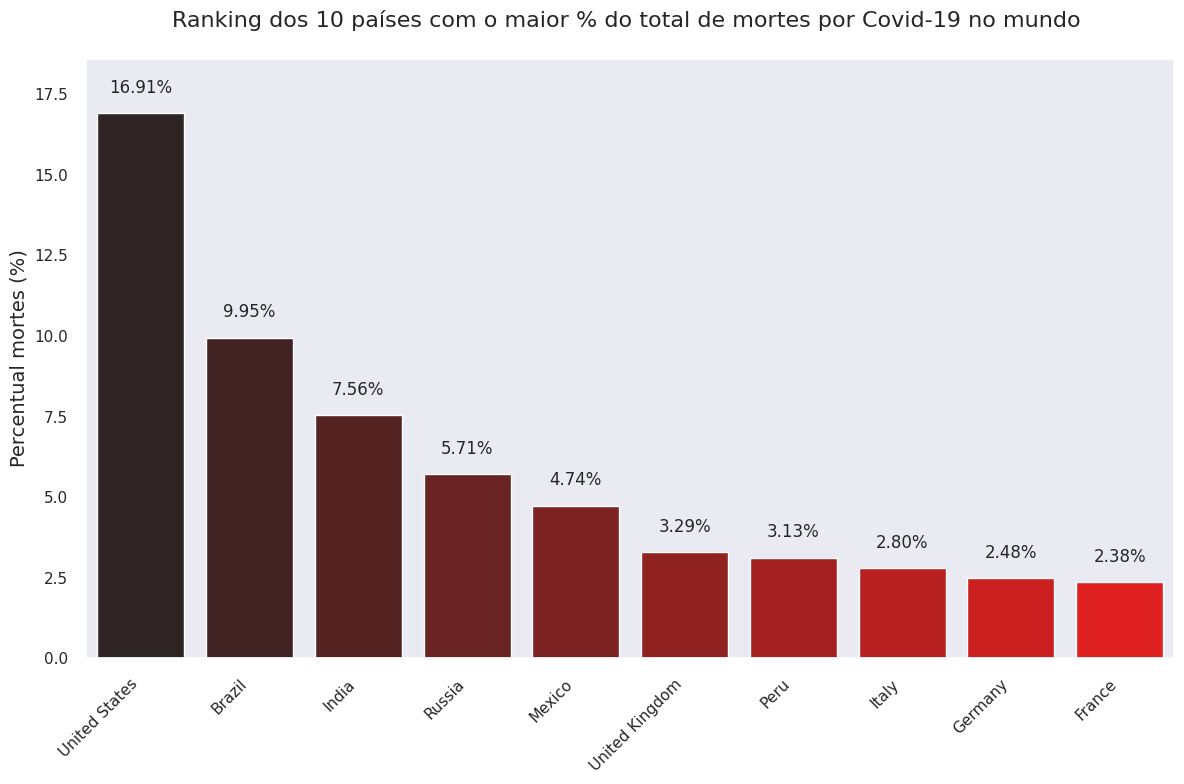

In [28]:
#Seleciona os dados percentuais de total deaths
dados_barplot = ((total_death_countries.total_deaths/total_death_world.total_deaths)* 100).sort_values(ascending = False).round(2).head(10)

plt.figure(figsize = (12, 8), dpi = 100)

#paleta de cores
paleta_vermelho = sns.dark_palette("red", n_colors = 10, as_cmap = False)


sns.barplot(x = dados_barplot.index, y = dados_barplot.values, hue = dados_barplot.index, palette = paleta_vermelho, legend = False)

#Adicionar labels e título
plt.xlabel(None)
plt.ylabel("Percentual mortes (%)", fontsize = 14)
plt.title("Ranking dos 10 países com o maior % do total de mortes por Covid-19 no mundo \n", fontsize = 16)
plt.xticks(rotation = 45, ha = 'right') # Rotate x-axis labels for better readability

#Adicionar valores percentuais no topo das barras
for i, value in enumerate(dados_barplot.values):
    plt.text(i, value + 0.5, f'{value:.2f}%', ha = 'center', va = 'bottom', fontsize = 12)

# Ajustar o limite do eixo Y
plt.ylim(0, dados_barplot.max() * 1.1) # Aumenta o limite superior do eixo Y em 10%

plt.tight_layout() #prevenir labels overlapping
plt.grid(False)

plt.show()

## Ranking com os 10 países que apresentaram mais mortes por covid-19 a cada  milhão de habitantes

In [29]:
#Seleciona os 10 países com o maior número de mortes por COVID-19 a cada milhão de habitantes.
deaths_per_million = df.groupby('location')['total_deaths_per_million'].max().sort_values(ascending = False).head(10)

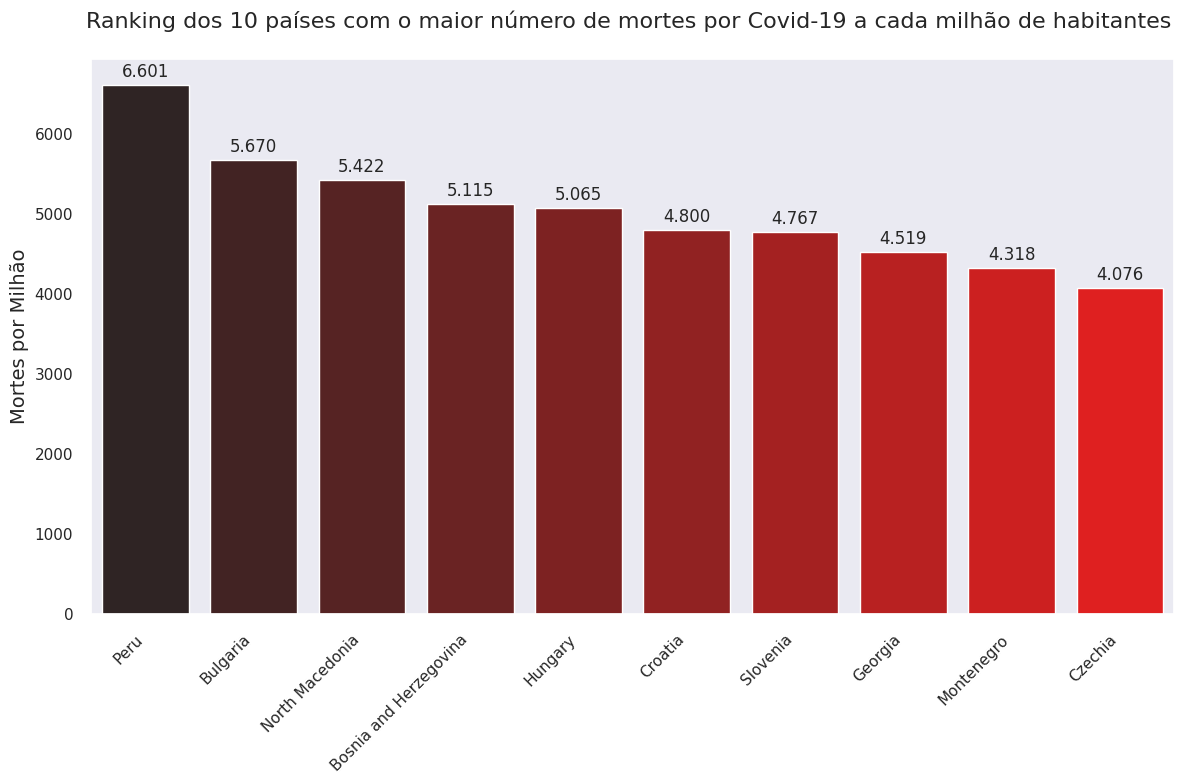

In [30]:
#Configuração gráfico
plt.figure(figsize=(12, 8), dpi = 100)

#paleta de cores
paleta_vermelho = sns.dark_palette("red", n_colors = 10, as_cmap = False)

sns.barplot(x = deaths_per_million.index, y = deaths_per_million.values, hue = deaths_per_million.index, palette = paleta_vermelho, legend = False)

#Adicionar labels e título
plt.xlabel(None)
plt.ylabel("Mortes por Milhão", fontsize = 14)
plt.title("Ranking dos 10 países com o maior número de mortes por Covid-19 a cada milhão de habitantes \n", fontsize = 16)
plt.xticks(rotation = 45, ha = 'right') # Rotate x-axis labels for better readability

#Adicionar valores percentuais no topo das barras
for i, value in enumerate(deaths_per_million.values):
    plt.text(i, value + 50, f'{value:,.0f}'.replace(',', '.'), ha = 'center', va = 'bottom', fontsize = 12)


plt.tight_layout() #prevenir labels overlapping
plt.grid(False)

# Display the plot
plt.show()

# **Ranking com os 10 países que apresentaram maior relação caso-fatalidade**

In [31]:
#Selecionar o último valor informado por cada país
taxa_letalidade_location = df.groupby('location')[['total_cases', 'total_deaths']].max()
taxa_letalidade_location['taxa_letalidade'] = round((taxa_letalidade_location['total_deaths']/taxa_letalidade_location['total_cases']) * 100, 2)
taxa_letalidade_location = taxa_letalidade_location['taxa_letalidade'].sort_values(ascending = False).head(10)

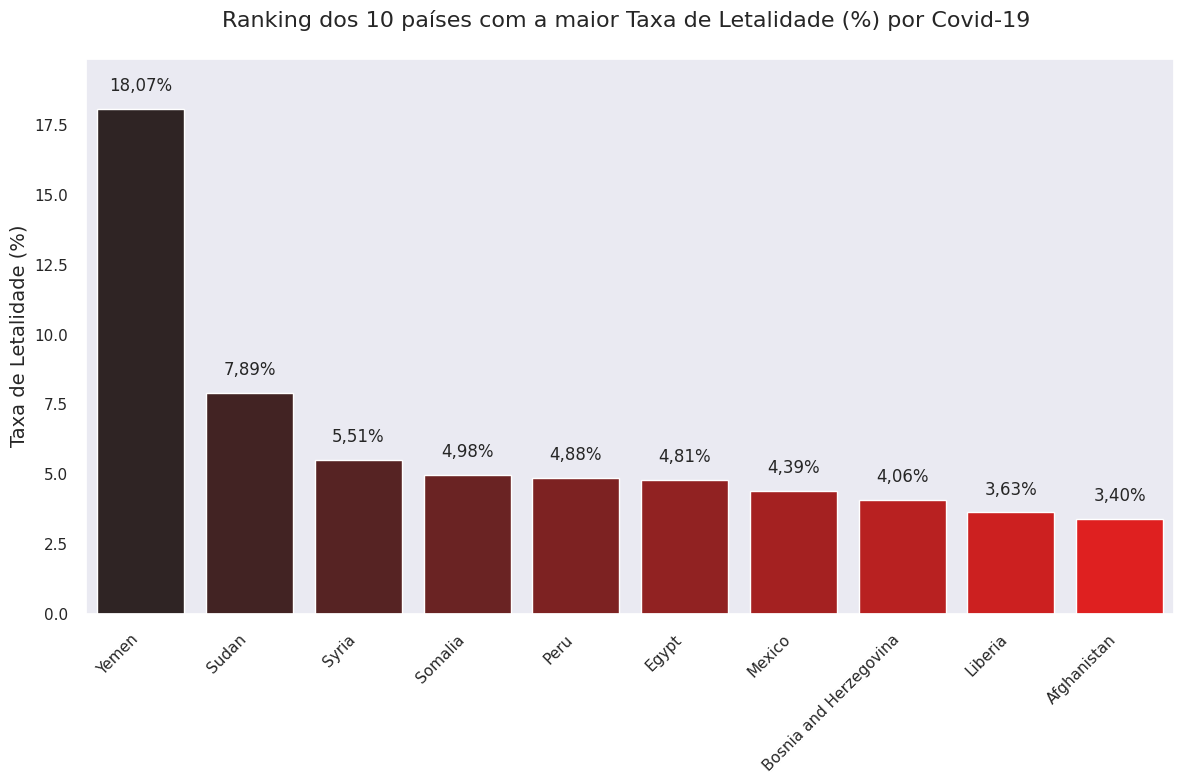

In [32]:
#Configuração gráfico
plt.figure(figsize=(12, 8), dpi = 100)

#paleta de cores
paleta_vermelho = sns.dark_palette("red", n_colors = 10, as_cmap = False)

sns.barplot(x = taxa_letalidade_location.index, y = taxa_letalidade_location.values, hue = taxa_letalidade_location.index, palette = paleta_vermelho, legend = False)

#Adicionar labels e título
plt.xlabel(None)
plt.ylabel("Taxa de Letalidade (%)", fontsize = 14) # Adjusted y-label
plt.title("Ranking dos 10 países com a maior Taxa de Letalidade (%) por Covid-19 \n", fontsize = 16) # Adjusted title
plt.xticks(rotation = 45, ha = 'right') # Rotate x-axis labels for better readability

#Adicionar valores percentuais no topo das barras
for i, value in enumerate(taxa_letalidade_location.values):
    plt.text(i, value + 0.5, f'{value:,.2f}%'.replace('.', ','), ha = 'center', va = 'bottom', fontsize = 12) # Adjusted formatting

plt.tight_layout() #prevenir labels overlapping
plt.grid(False)

# Ajustar o limite do eixo Y
plt.ylim(0, taxa_letalidade_location.max() * 1.1) # Aumenta o limite superior do eixo Y em 10%

# Display the plot
plt.show()

# **Números da vacinação**

**<h2>Números da vacinação por continente</h2>**

In [33]:
#Selecionar os dados de interesse para analisar os números por continente
df_vaccination = df_continents.groupby('location')[['total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
                                                       'people_fully_vaccinated_per_hundred']].max().sort_values(by = 'location')

#Substituir vírgula por ponto
for col in ['total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated']:
    df_vaccination[col] = df_vaccination[col].apply(lambda x: "{:,}".format(x)).astype(str).str.replace(',', '.', regex=False)

df_vaccination

,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred
location,,,,,,
Africa,863.237.900,555.027.330,462.411.423,60.50,38.90,32.41
Asia,9.104.304.615,3.689.438.947,3.462.095.463,192.83,78.14,73.33
Europe,1.399.334.208,523.814.328,493.751.304,187.88,70.33,66.29
North America,1.158.547.416,458.563.506,394.493.922,192.99,76.39,65.71
Oceania,88.358.812,28.960.501,28.072.902,196.18,64.30,62.33
South America,964.991.405,375.459.127,337.117.943,220.91,85.95,77.18


**<h2>Ranking com os 10 países que tiveram o maior número de pessoas totalmente vacinadas a cada 100 habitantes</h2>**

In [34]:
#Selecionar os dados top 10
top10_vaccination_per_hundred = df.groupby('location')['people_fully_vaccinated_per_hundred'].max().sort_values(ascending = False).head(10)

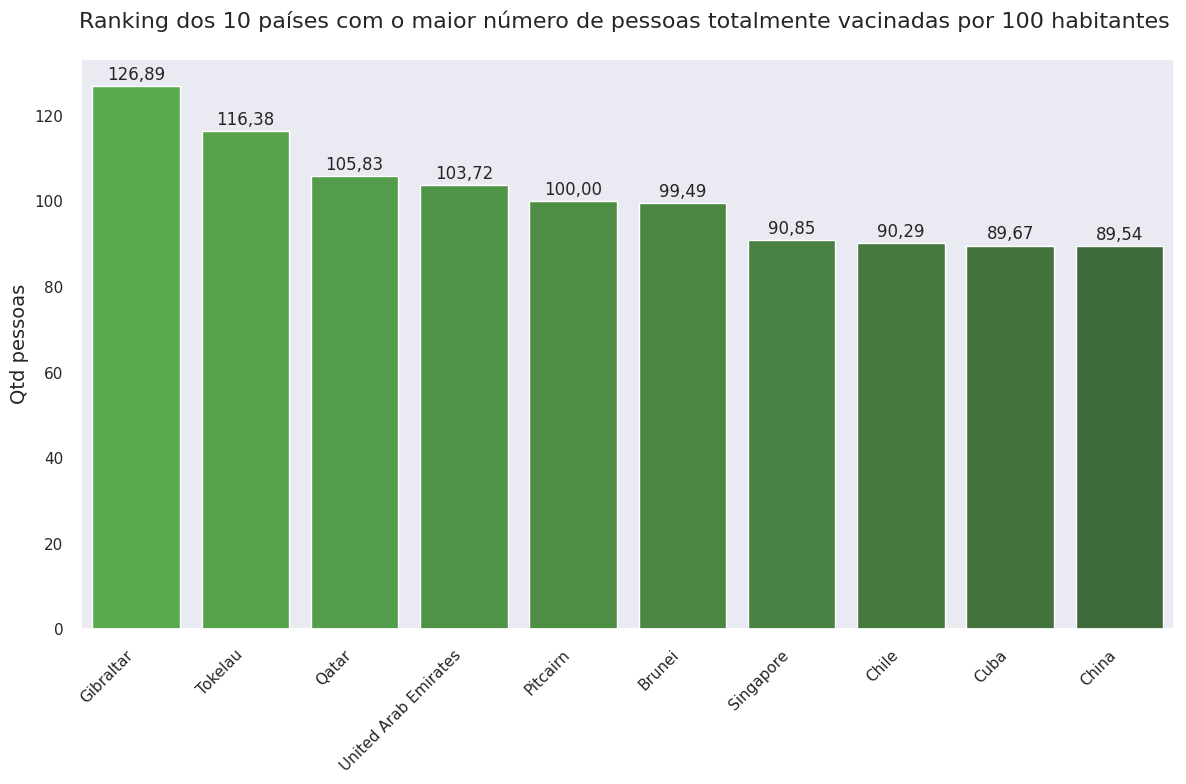

In [35]:
#Configuração gráfico
plt.figure(figsize=(12, 8), dpi = 100)

#paleta de cores
# Usando sns.color_palette com uma paleta sequencial e especificando n_colors
paleta_verde_completa = sns.dark_palette("#4db93f", reverse = True, as_cmap = False, n_colors = 20) # Gerar mais cores
paleta_verde = paleta_verde_completa[:10] # Selecionar os primeiros 10 tons (os mais escuros)


sns.barplot(x = top10_vaccination_per_hundred.index, y = top10_vaccination_per_hundred.values, hue = top10_vaccination_per_hundred.index, palette = paleta_verde, legend = False)

#Adicionar labels e título
plt.xlabel(None)
plt.ylabel("Qtd pessoas", fontsize = 14)
plt.title("Ranking dos 10 países com o maior número de pessoas totalmente vacinadas por 100 habitantes \n", fontsize = 16)
plt.xticks(rotation = 45, ha = 'right')

#Adicionar valores percentuais no topo das barras
for i, value in enumerate(top10_vaccination_per_hundred.values):
    plt.text(i, value + 0.5, f'{value:,.2f}'.replace('.', ','), ha = 'center', va = 'bottom', fontsize = 12) # ajustar formato

plt.tight_layout() #prevenir labels overlapping
plt.grid(False)


# Display the plot
plt.show()

**<h2>Ranking dos 10 países que tiveram o menor número de pessoas totalmente vacinadas a cada 100 habitantes</h2>**

In [36]:
#Selecionar os dados bottom 10
bottom10_vaccination_per_hundred = df.groupby('location')['people_fully_vaccinated_per_hundred'].max().sort_values(ascending = True).head(10)

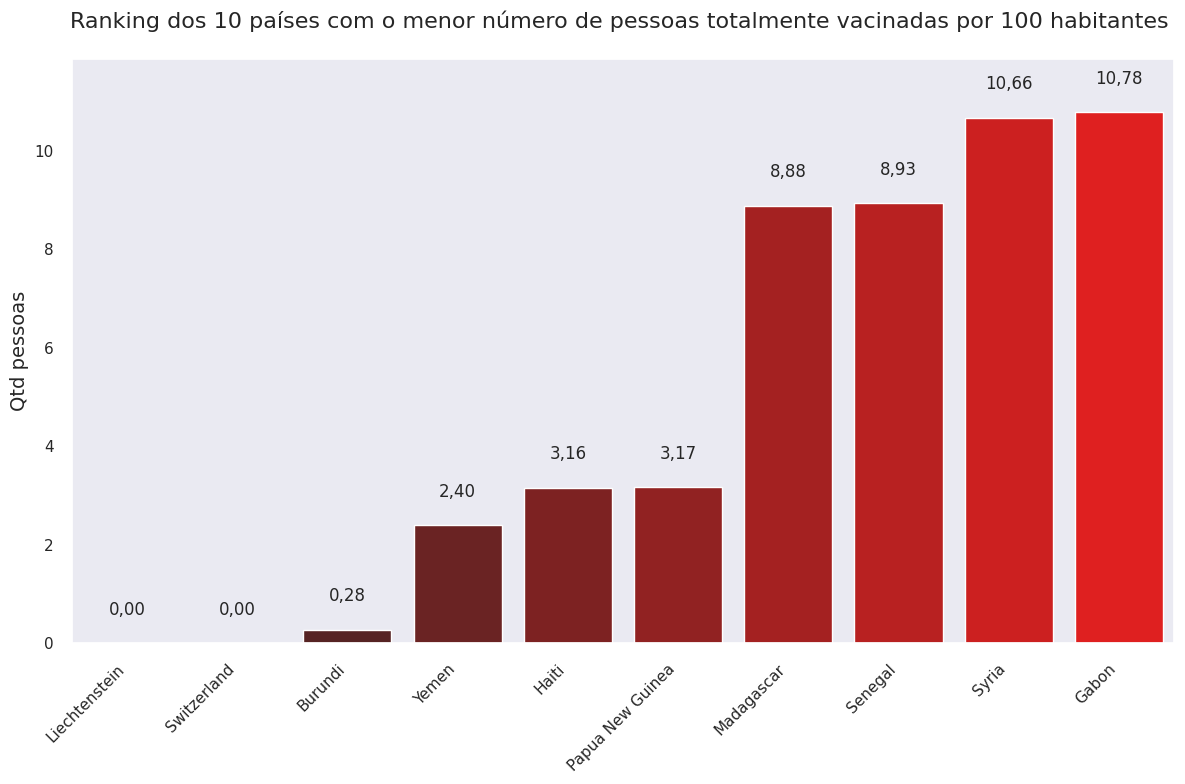

In [37]:
#Configuração gráfico
plt.figure(figsize=(12, 8), dpi = 100)

#paleta de cores
paleta_vermelho = sns.dark_palette("red", n_colors = 10, as_cmap = False)

sns.barplot(x = bottom10_vaccination_per_hundred.index, y = bottom10_vaccination_per_hundred.values, hue = bottom10_vaccination_per_hundred.index, palette = paleta_vermelho, legend = False)

#Adicionar labels e título
plt.xlabel(None)
plt.ylabel("Qtd pessoas", fontsize = 14)
plt.title("Ranking dos 10 países com o menor número de pessoas totalmente vacinadas por 100 habitantes \n", fontsize = 16) # Corrected title to 100 inhabitants
plt.xticks(rotation = 45, ha = 'right')

# Adicionar valores percentuais no topo das barras
for i, value in enumerate(bottom10_vaccination_per_hundred.values):
    plt.text(i, value + .5, f'{value:,.2f}'.replace('.', ','), ha = 'center', va = 'bottom', fontsize = 12) # Increased y-position for text


plt.tight_layout() #prevenir labels overlapping
plt.grid(False)

# Ajustar o limite do eixo Y
plt.ylim(0, bottom10_vaccination_per_hundred.max() * 1.1) # Aumenta o limite superior do eixo Y em 10%

plt.show()